<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 Langrange Polynomial Interpolation**

Lagrange polynomial interpolation uses a single polynomial function that goes through all data points. It is represented using L(x) = yi for every point in the data set. For computation of langrange polynomials, you can compute the sum of lagrange basis polynomials with the form P(x) = (x-xj)/(xi-xj)

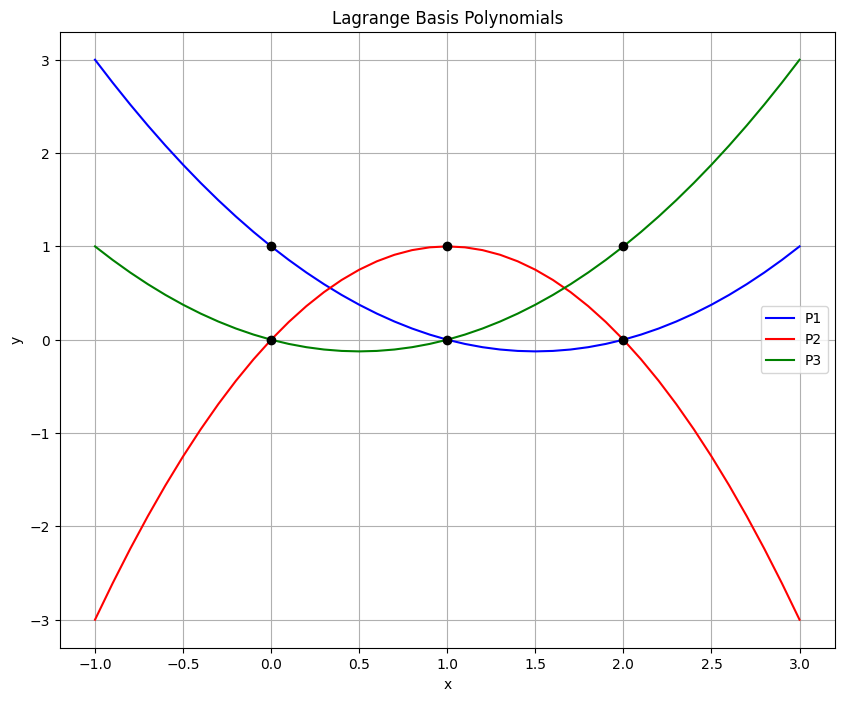

In [1]:
#Finding the lagrange basis polynomials to calculate the final polynomial.

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5] # [0.5, -3/2, 1]
P2_coeff = [0, 2,-1] # [-1, 2, 0]
P3_coeff = [0,-.5,.5] # [0.5, -0.5, 0]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

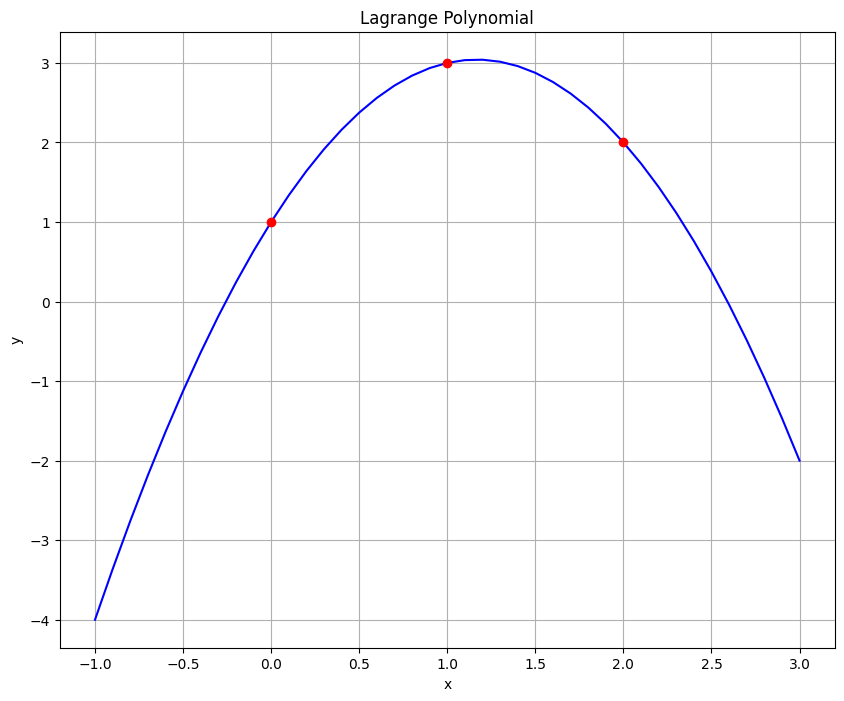

In [2]:
#Now we can compute the sum of the basis polynomials with their coefficients to get our interpolation.

L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We must be careful though to not interpolate data outside this region though as [x1,xn] will grow fast and become unbounded outside this region.

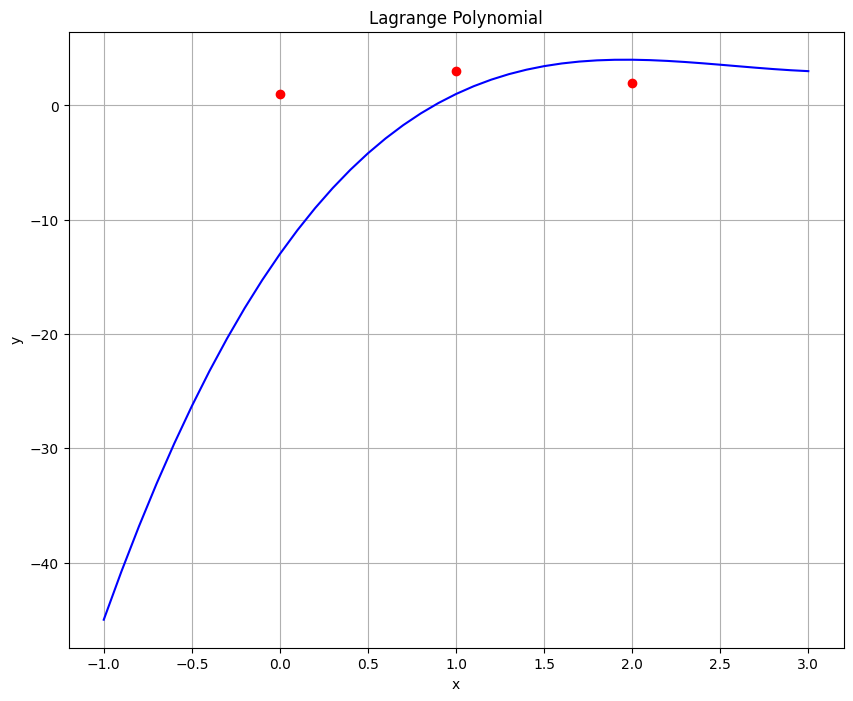

In [8]:
# We can also use the langrange function from the scipy library to avoid the extra work done previously.

from scipy.interpolate import lagrange

a = [1,2,3,4]
b = [1,4,3,5]

f = lagrange(a,b)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5 Newton's Polynomial Interpolation**

Another populat way to fit exactly for a set of data points is Newton's polynomial interpolation. The way to represent it is: sum((ai)(ni)(x)) from i = 0 to n where n = product(x-xj) from j = 0 to j= i - 1. What makes Newton's polynomial interpolation different from lagrange interpolation is the calculation of the coefficients is simpler through divided differences where one the coefficients are determined, new data point entries will not alter them. The result will be the same to lagrange as it satisfies f(xi) = yi for the set of data points (xi, yi).

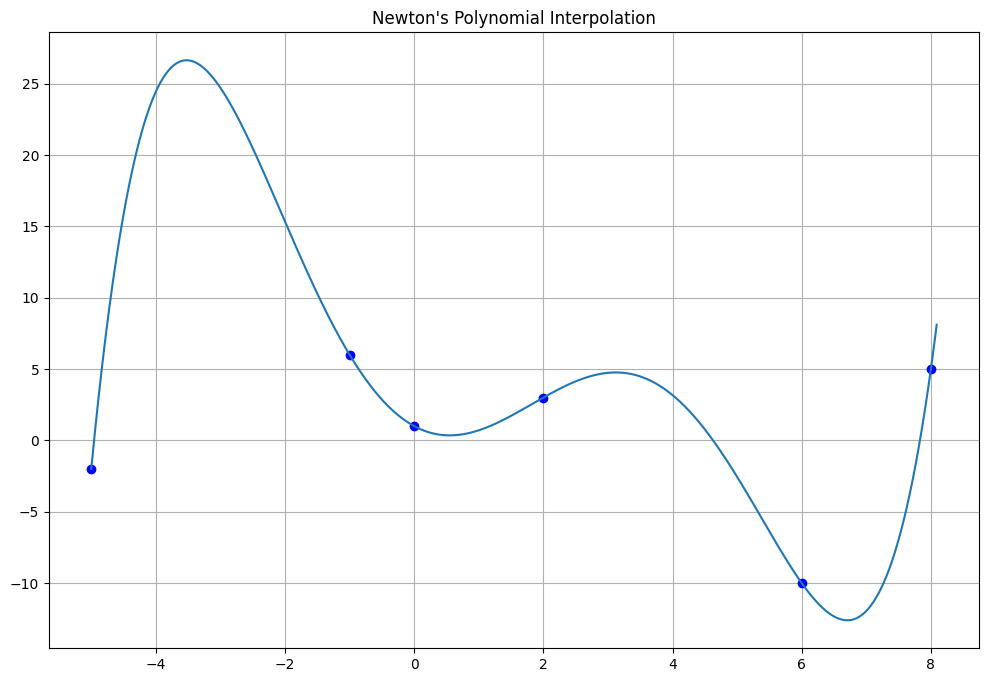

In [12]:
# Using Newton's polynomial interpolation with datasets x = [-5,1,0,2] and y = [-2,6,1,3] through calculation of the divided differences.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-5, -1, 0, 2, 6, 8]) ; y = np.array([-2, 6, 1, 3, -10, 5])

a_s = divided_diff(x, y)[0, :] # Calculating coefficients via the divided difference

# evaluate on new data points
x_new = np.arange(-5, 8.1, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation") ; plt.grid()
plt.show()

As shown, the polynomial is fitted and intersects each of the data points to interpolate the provided data set.